In [1]:
import pandas as pd
fileURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
data = pd.read_csv(fileURL, names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Name'], header=None)

In [2]:
data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


There are four features including sepal length, sepal width, petal length and petal width. They are all numerical. 

For the four features, we can compute there minimum value, maximum value, mean, range, standard deviation, variance, count, and 25:50:75% percentiles as follows:

In [3]:
def describe_feature(self):
    """ describe  of a series """
    l = [ ('min'   , self.min()     ),
          ('max'   , self.max()     ),
          ('mean'  , self.mean()    ),
          ('range'  , self.ptp()    ),
          ('std'   , self.std()     ),
          ('variance'   , self.var()     ),
          ('count' , self.count()   ),
          ('25%'   , self.quantile(0.25)),
          ('50%'   , self.median()  ),
          ('75%'   , self.quantile(0.75))]
    s = pd.Series(dict(l), index = [ k for k, v in l ])
    s[s.abs()<0.000001] = 0.0
    return s

In [4]:
s1 = describe_feature(data['Sepal Length'])
s2 = describe_feature(data['Sepal Width'])
s3 = describe_feature(data['Petal Length'])
s4 = describe_feature(data['Petal Width'])
iris_df = pd.concat([s1, s2, s3, s4], axis=1)
iris_df = iris_df.rename(index=str, columns={0: "Sepal Length", 1: "Sepal Width", 2: "Petal Length", 3: "Petal Width"})
iris_df

,Sepal Length,Sepal Width,Petal Length,Petal Width
min,4.300000,2.000000,1.000000,0.100000
max,7.900000,4.400000,6.900000,2.500000
mean,5.843333,3.054000,3.758667,1.198667
range,3.600000,2.400000,5.900000,2.400000
std,0.828066,0.433594,1.764420,0.763161
variance,0.685694,0.188004,3.113179,0.582414
count,150.000000,150.000000,150.000000,150.000000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000


### Data Visualization - Histograms

In [5]:
import matplotlib.pyplot as plt

#### Histograms - Feature 1 - Sepal Length:

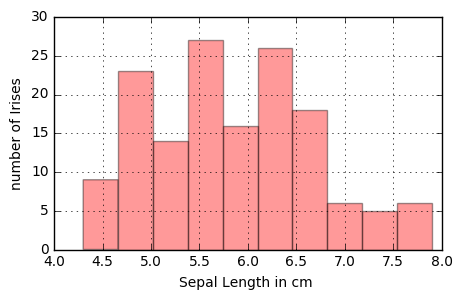

In [6]:
data['Sepal Length'].hist(color='r',alpha=0.4, figsize=(5,3))
plt.xlabel('Sepal Length in cm ')
plt.ylabel('number of Irises')
plt.show()

#### Histograms - Feature 2 - Sepal Width:

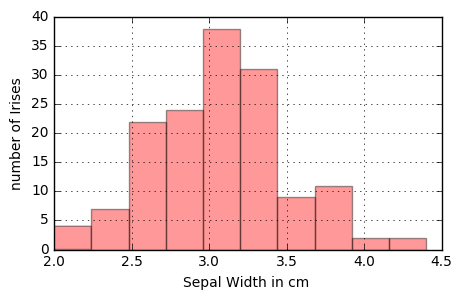

In [7]:
data['Sepal Width'].hist(color='r',alpha=0.4, figsize=(5,3))
plt.xlabel('Sepal Width in cm ')
plt.ylabel('number of Irises')
plt.show()

#### Histograms - Feature 3 - Petal Length:

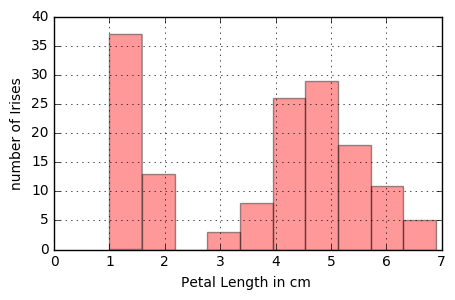

In [8]:
data['Petal Length'].hist(color='r',alpha=0.4, figsize=(5,3))
plt.xlabel('Petal Length in cm ')
plt.ylabel('number of Irises')
plt.show()

#### Histograms - Feature 4 - Petal Width:

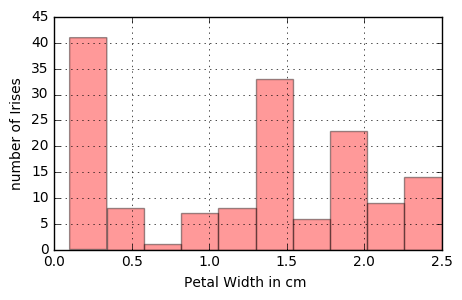

In [9]:
data['Petal Width'].hist(color='r',alpha=0.4, figsize=(5,3))
plt.xlabel('Petal Width in cm ')
plt.ylabel('number of Irises')
plt.show()

#### Adiditional Histograms - Name:

In [10]:
name_distribution_series = data['Name'].to_frame().groupby(['Name']).size()

In [11]:
name_distribution_series

Name
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [12]:
name_distribution_df = name_distribution_series.to_frame()

In [13]:
name_distribution_df.columns = ['count']

In [14]:
name_distribution_df

,count
Name,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


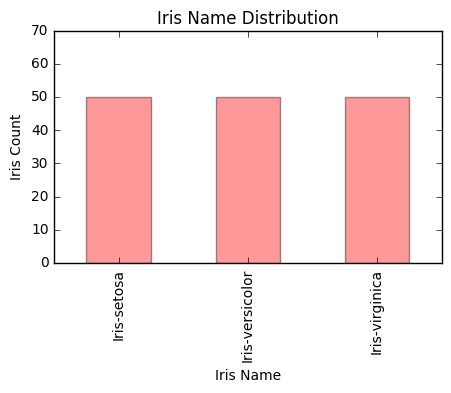

In [15]:
ax = name_distribution_df['count'].plot(kind='bar', title ="Iris Name Distribution", color='r',alpha=0.4, figsize=(5,3))
ax.set_xlabel("Iris Name")
ax.set_ylabel("Iris Count")
ax.set_ylim([0,70])
plt.show()

### Data Visualization - Box Plots

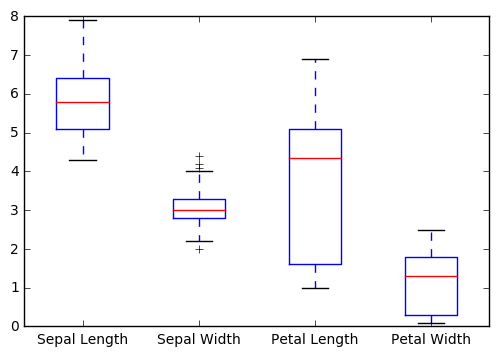

In [16]:
box = data.boxplot(grid=False, return_type='axes')
plt.show()

## Part 2 – Pen-Based Handwritten Digits Dataset

In [17]:
digits_data = pd.read_csv('pendigits.tra', header=None)

In [18]:
digits_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


There are 16 features. They are all numerical, integers from [0, 15].

For these features, we can compute there minimum value, maximum value, mean, range, standard deviation, variance, count, and 25:50:75% percentiles as follows:

In [19]:
series_list = []
for i in range (16):
    s = describe_feature(digits_data[i])
    series_list.append(s)

In [20]:
digits_df = pd.concat(series_list, axis=1)
digits_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,37.384307,84.679343,40.005604,82.889512,50.878303,65.044436,51.471844,44.599680,57.129971,34.069122,61.417401,35.782092,54.699760,35.800774,46.813718,28.565386
range,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
std,33.322024,16.848420,26.256025,19.638582,34.927201,27.377341,30.680075,30.659478,33.680340,27.459989,37.130762,27.495836,22.599781,33.223611,41.531794,35.811094
variance,1110.357293,283.869273,689.378856,385.673898,1219.909384,749.518778,941.266990,940.003609,1134.365329,754.051007,1378.693497,756.020974,510.750095,1103.808295,1724.889891,1282.434467
count,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000
25%,5.000000,76.000000,20.000000,70.000000,17.000000,48.000000,28.000000,22.000000,30.000000,7.000000,25.000000,12.000000,41.000000,7.000000,0.000000,0.000000
50%,31.000000,89.000000,39.000000,89.000000,56.000000,71.000000,54.000000,42.000000,60.000000,33.000000,74.000000,32.000000,53.000000,28.000000,39.000000,8.000000
75%,61.000000,100.000000,58.000000,100.000000,81.000000,86.000000,75.000000,65.000000,88.000000,55.000000,98.000000,57.000000,69.000000,48.000000,100.000000,51.000000


### Data Visualization - Histograms

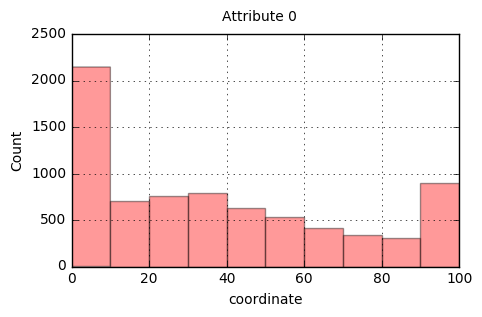

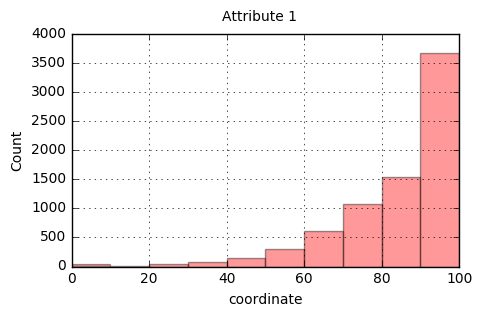

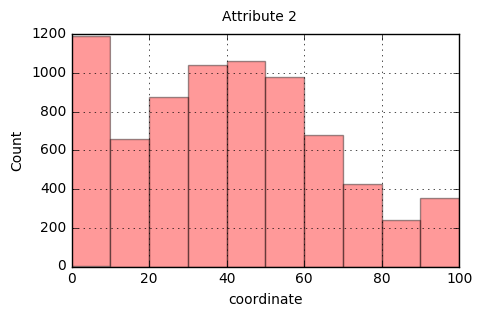

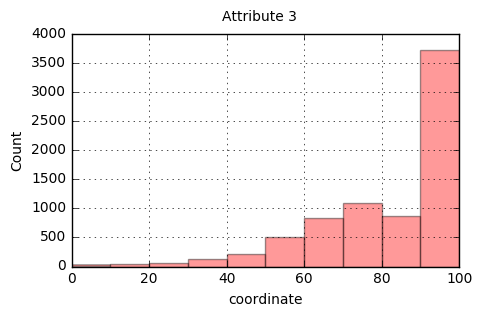

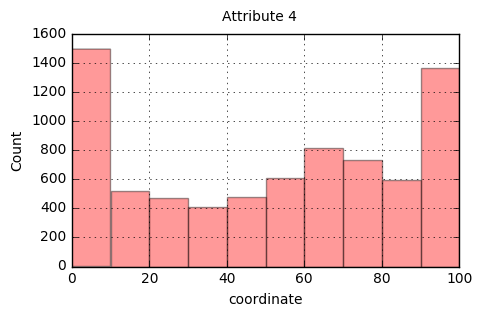

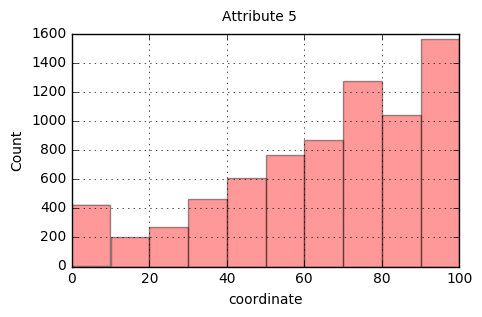

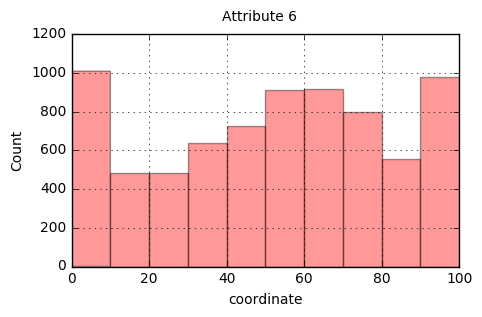

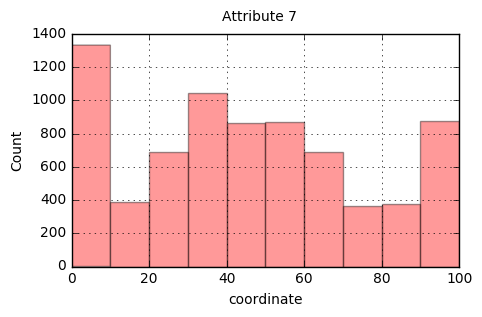

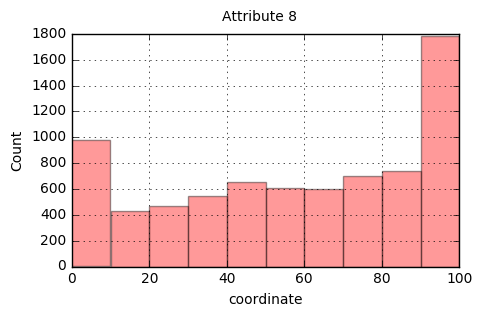

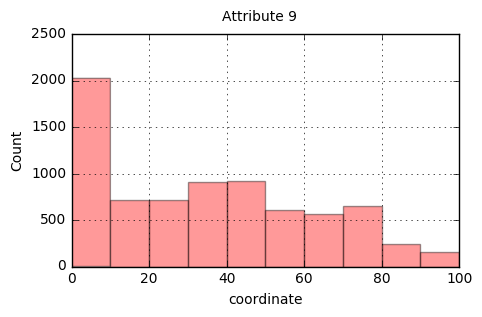

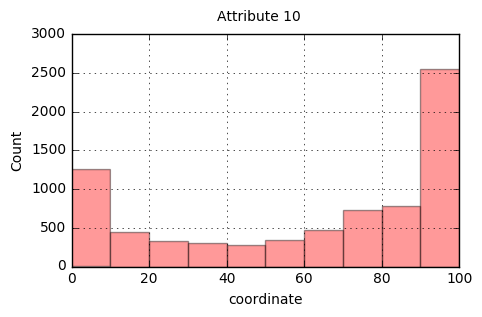

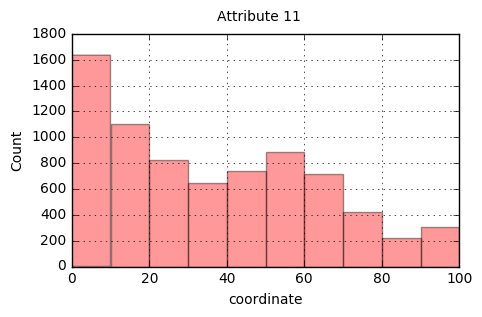

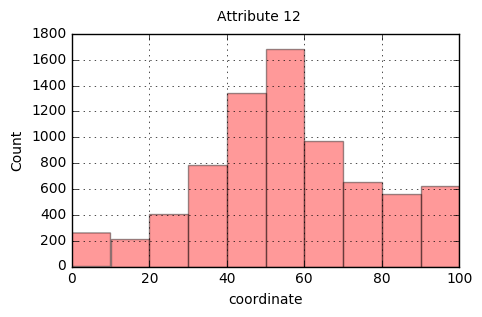

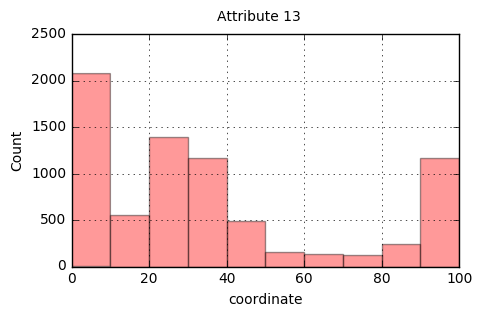

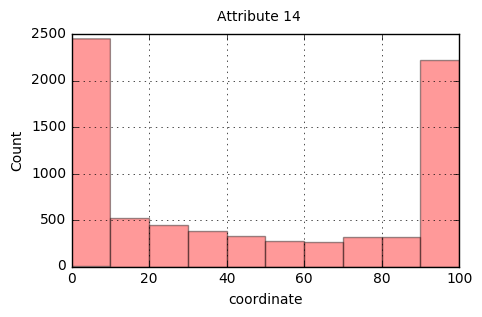

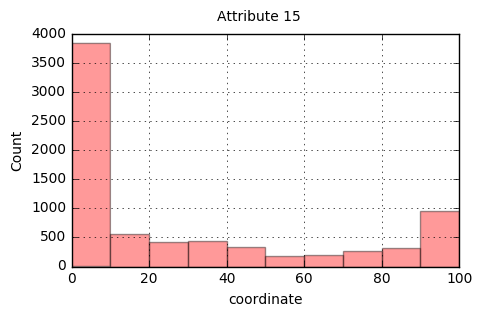

In [21]:
for i in range (16):
    digits_data[i].hist(color='r',alpha=0.4, figsize=(5,3))
    plt.suptitle('Attribute ' + str(i))
    plt.xlabel('coordinate')
    plt.ylabel('Count')
    plt.show()

### Data Visualization - Box Plots

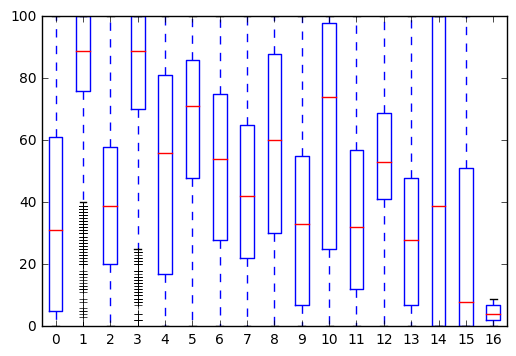

In [22]:
digits_box = digits_data.boxplot(grid=False, return_type='axes')
plt.show()

## Part 3 – Conceptual Questions

Shapes for sepal length/width is close to normal distribution, highest in the center, lower on the sides. Shapes for petal length/width is overall decreasing, highest initially, drop dramatically (close to 0), increase again, and decrease towards the end. 

Now consider just the petal length histogram. There is a particular value of petal length, 2.5 cm, where the distribution of petal lengths could be best segmented into two parts?

Now consider the boxplots for Iris dataset. Sepal length and petal width have significantly different medians, since sepal length seems to has the largest median and petal width has the smallest median. Also, base solely upon the box plots, petal length appears to explain the greatest amount of data because it has the largest range among the four.

On the digits dataset, I observe many outliners for Attribute 1 and 3. Looking at the histograms, the second and forth features display a exponential trend, starting from almost 0, increase slowly at first, then increase rapidly towards the maximum coordinate (100). According to the histograms, it is assumed that the data are clustered around [75, 100] for attribute 1 and [70, 100] for attribute 3. Data ranging from [0, 40] for attribute 1 and [0, 30] for attribute 3 are too far away from the clustered values, they lie outside the range in which we expect them. 